<a href="https://colab.research.google.com/github/csch7/Computational-Physics/blob/main/Homework_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Planetary Motion

The equation for planetary motion is: $$\begin{align}F=-\frac{GmM}{r^2}\text{, where }r=\sqrt{x^2+y^2}\end{align}$$Also, since $F=ma$, $$a=-\frac{GM}{r^2}$$
Separating the force components, $a_x=a\cos(\theta)=a\frac{x}{r}$, and $a_y=a\sin(\theta)=a\frac{y}{r}$. This leads to: $$a_x=-\frac{GMx}{r^3},\ \ a_y=-\frac{GMy}{r^3}$$

For solving the ODE, I have chosen the Runge-Kutta method of order 5(4), implemented by SciPy. In general, this method is more accurate than both Euler's rule and RK2, and can be solved relatively efficiently.

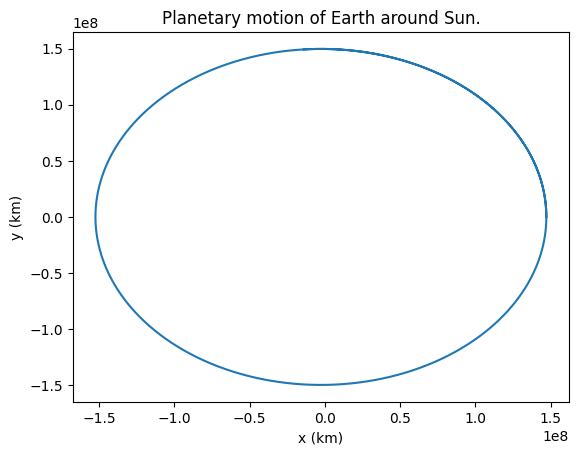

In [9]:
from scipy.integrate import ode
from scipy.integrate import RK45
import numpy as np
import matplotlib.pyplot as plt


# Function for calculating positions and velocities using the equations derived above.
def func(t, z):
  gm = 1.327E11 # Constant G*M
  denom = (z[0]**2 + z[2]**2)**-1.5
  dydt = np.zeros((4,))
  dydt[0] = z[1]
  dydt[1] = -1*gm*z[0]*denom
  dydt[2] = z[3]
  dydt[3] = -1*gm*z[2]*denom
  return dydt


# FIRST EXPERIMENT
xi = 147103686 # Initially, earth is at perihelion (91.4*10^6 miles = 147.1*10^6 km)
vxi = 0      # Initially, x-velocity is 0
yi = 0       # Since earth at perihelion, there is no y-location
vyi = 30.28   # Earth velocity at perihelion
t0 = 0
t_bound = 100000000
rtol=0.01
maxsteps= 20000
solver = RK45(func, t0, [xi, vxi, yi, vyi], t_bound, max_step=maxsteps,rtol=rtol)
ts = []
ys = []
for i in np.arange(2000):
  solver.step()
  ts.append(solver.t)
  ys.append(solver.y)
y0 = [y[0] for y in ys]
y1 = [y[1] for y in ys]
y2 = [y[2] for y in ys]
y3 = [y[3] for y in ys]
plt.plot(y0, y2)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('Planetary motion of Earth around Sun.')
plt.show()

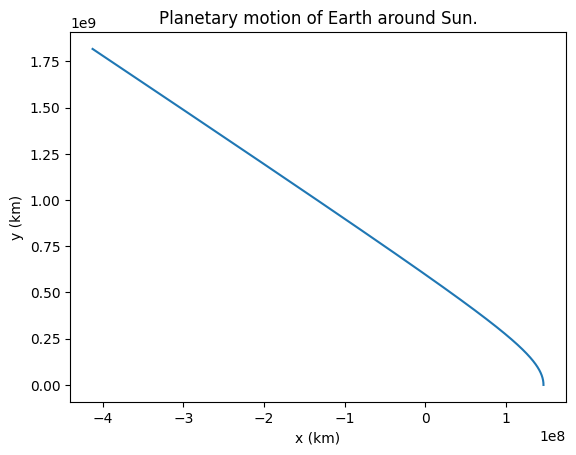

In [10]:
# SECOND EXPERIMENT
xi = 147103686 # Initially, earth is at perihelion (91.4*10^6 miles = 147.1*10^6 km)
vxi = 0      # Initially, x-velocity is 0
yi = 0       # Since earth at perihelion, there is no y-location
vyi = 60.56   # Earth velocity at perihelion

t0 = 0
t_bound = 100000000
rtol=0.01
maxsteps= 20000
solver = RK45(func, t0, [xi, vxi, yi, vyi], t_bound, max_step=maxsteps,rtol=rtol)

ts = []
ys = []
for i in np.arange(2000):
  solver.step()
  ts.append(solver.t)
  ys.append(solver.y)

y0 = [y[0] for y in ys]
y1 = [y[1] for y in ys]
y2 = [y[2] for y in ys]
y3 = [y[3] for y in ys]

plt.plot(y0, y2)
plt.xlabel('x (km)')
plt.ylabel('y (km)')
plt.title('Planetary motion of Earth around Sun.')
plt.show()

As a result of doubling the initial y-velocity, the Earth falls out of orbit and instead flies into nothingness in the y-direction. The Sun's gravity is not strong enough to keep the Earth in stable orbit at this velocity.

## Examples of ODEs without analytic solutions

- One example is the ODE describing the motion of a pendulum: $$mL^2\ddot\theta=-mgL\sin(\theta)$$ In theoretical mechanics, we solved this problem by using a small-angle approximation, but never solved the exact ODE.

- Another example is the Duffing Equation: $$\ddot{x}+\delta\dot{x}+\alpha x+\beta x^3=\gamma \cos(\omega t)$$

- A third example is the Van der Pol oscillator, which is given by the second-order ODE $$\ddot{x}-\mu(1-x^2)\dot{x}+x=0$$

## Lorenz System

Below I consider a Lorenz system and a visualization, using $\rho=28$, $σ=10$, and $β=\frac{8}{3}$. These parameters and equations were taken from Wikipedia.

Solver convergence detected, exiting...


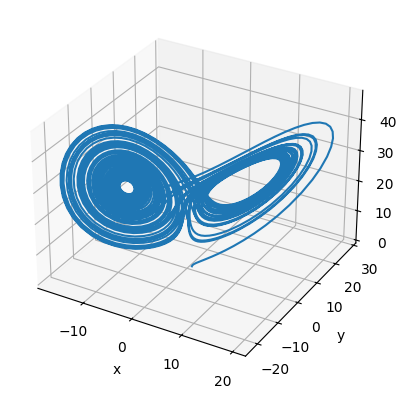

In [ ]:
rho, sigma, beta = 28, 10, 8/3

def double_pen(t, y):
  x, y, z = y
  dxdt = sigma*(y-x)
  dydt = x*(rho-z) - y
  dzdt = x*y - beta*z
  return [dxdt, dydt, dzdt]


ic = [1, 0, 0]

t0 = 0
t_bound = 50
rtol=0.0000001
maxsteps= 20 #np.inf
solver = RK45(double_pen, t0, ic, t_bound, max_step=maxsteps,rtol=rtol)

ts = []
ys = []

try:
  for i in np.arange(5000):
    solver.step()
    ts.append(solver.t)
    ys.append(solver.y)
except:
  print('Solver convergence detected, exiting...')

x, y, z = [y[0] for y in ys], [y[1] for y in ys], [y[2] for y in ys]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.plot(x, y, z)
plt.show()

I believe the original Lorenz system was derived from an approximation of the motion of a fluid that was being uniformly heated from the bottom and uniformly cooled from above. This can be interpreted from looking at the graph above: the fluid generally travels in cycles, where it initially rises (from getting heated), and then slowly sinks as it gets cooled, all while traveling in constant cycles. Indeed, the visualization above looks similar to what I imagine air convection to look like: swirling around itself, while sinking after getting cooled, then rising after getting heated.